<a href="https://colab.research.google.com/github/flairbop/microsoft_stock_prediction/blob/main/microsoft_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving MicrosoftStock.csv to MicrosoftStock.csv


In [5]:
df = pd.read_csv('MicrosoftStock.csv')
df.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [7]:
df.shape

(1259, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


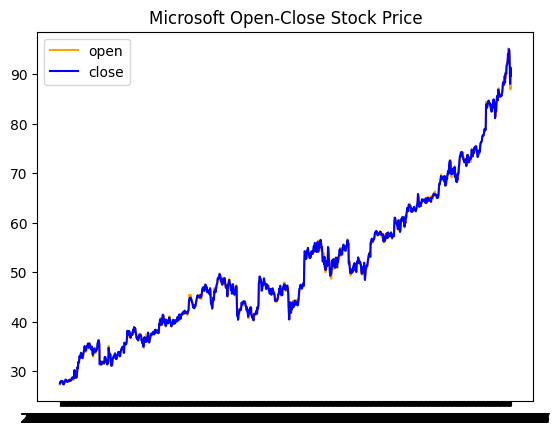

In [9]:
plt.plot(df['date'],
         df['open'],
         color='orange',
         label='open')
plt.plot(df['date'],
         df['close'],
         color='blue',
         label='close')
plt.title('Microsoft Open-Close Stock Price')
plt.legend()

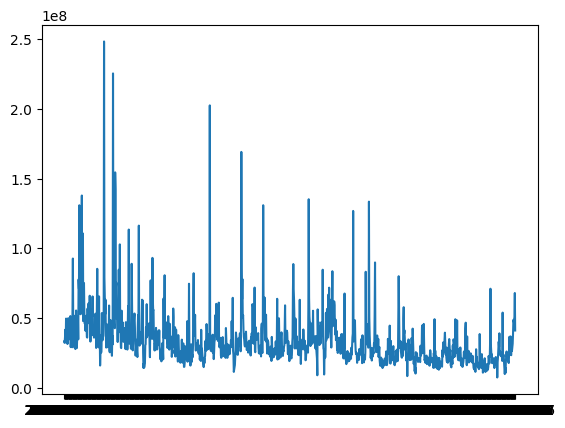

In [11]:
plt.plot(df['date'],
         df['volume'])
plt.show()

Text(0.5, 1.0, 'Microsoft Stock Prices')

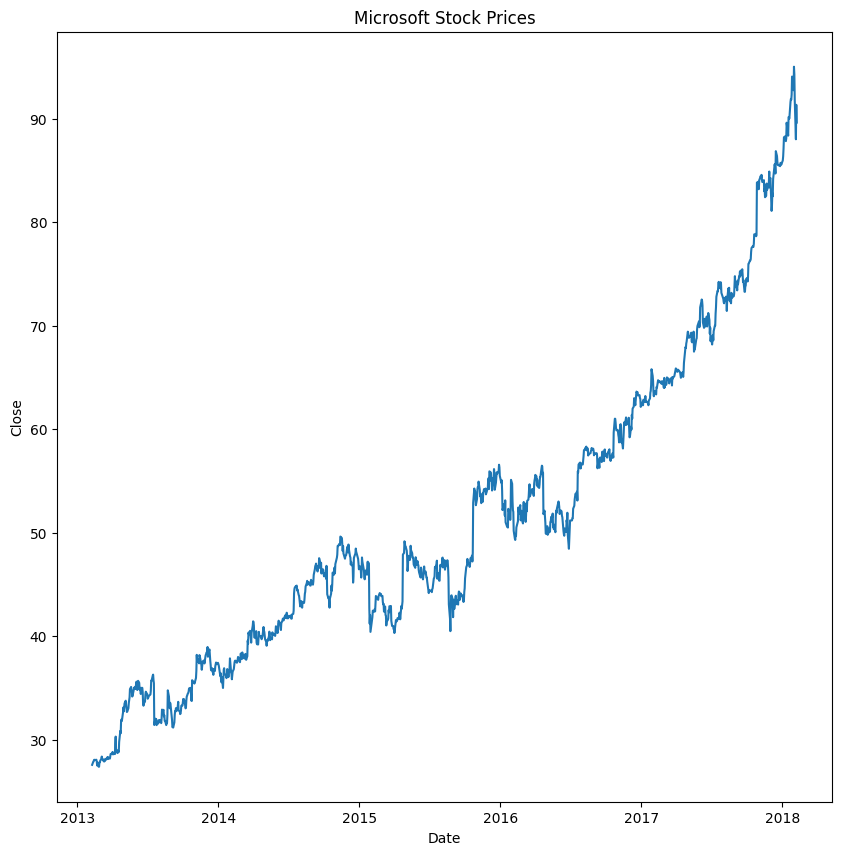

In [15]:
df['date'] = pd.to_datetime(df['date'])
prediction = df.loc[(df['date']
							> datetime(2013, 1, 1))
							& (df['date']
							< datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(df['date'], df['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")


In [17]:
#prepare the training set samples
msft_close = df.filter(['close'])
dataset = msft_close.values
training = int(np.ceil( len(dataset) * .95 ))

#scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training)  , : ]

x_train = []
y_train = []

# considering 60 as the batch size,
#create the x_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(units=128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam', loss='mae', metrics=[RootMeanSquaredError()])
hsitory = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.3271 - root_mean_squared_error: 0.4566
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1053 - root_mean_squared_error: 0.1454
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1006 - root_mean_squared_error: 0.1360
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0923 - root_mean_squared_error: 0.1242
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0895 - root_mean_squared_error: 0.1213
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0862 - root_mean_squared_error: 0.1161
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0927 - root_mean_squared_error: 0.1222
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0920 - root_mean_squared_error: 0.1245
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0905 - root_mean_squared_error: 0.1208
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0826 - root_mean_squared_error: 0.1108

In [22]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
	x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
					(x_test.shape[0],
					x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step


<ipython-input-23-f2c6cc99fbca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


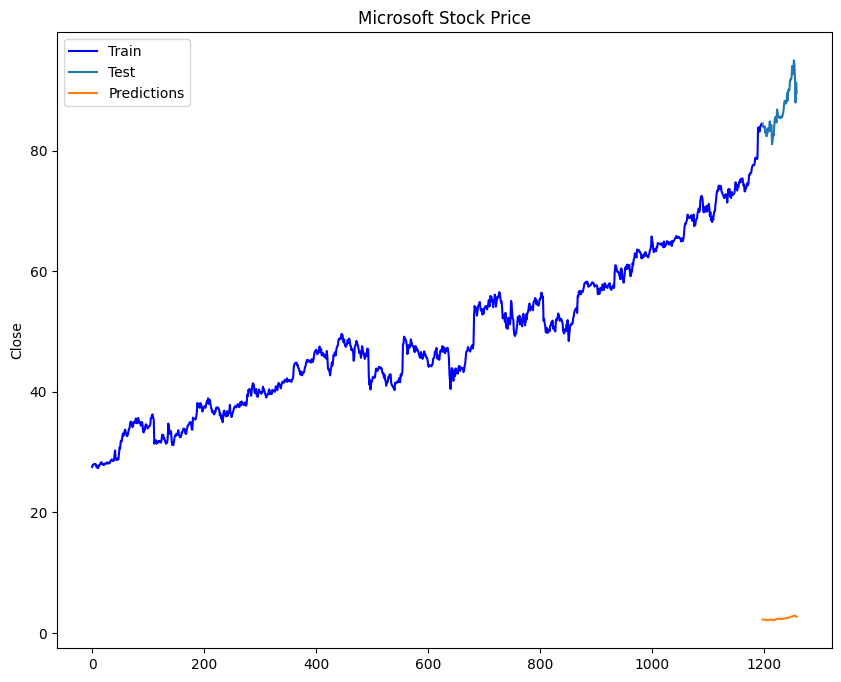

In [23]:
train = df[:training]
test = df[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c='b')
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Price')
plt.ylabel('Close')
plt.legend(['Train', 'Test', 'Predictions'])